<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_08_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For this tutorial, instead of individual bite-sized exercises, a modified copy of the notebook on Exploratory Data Analysis, Training, Evaluating and Tuning Models (I) would be given. You would need to complete certain parts of the codes yourself (indicated with `## YOUR CODE HERE ##`). For the given parts of the code, try understanding them as much as possible instead of simply mindlessly executing all of them. Refer to the original notebook for solutions.

---

# MIMIC-III Example: Hospital Length-of-Stay Prediction

---

# 1. Objectives

This notebook serves as an example to demonstrate the codes for training machine learning models for a **regression problem** instead of a classification problem. In actuality, using the following list of input features is most likely flawed as hospital stay-normalized variables such as `LAB_COUNT_DAY` is inherently calculated from LOS. Any applications built on this model would likely be problematic.

---

# 2. Setting up

**Packages for data handling and visualization**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

import os

**Packages for data analysis and modelling**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Import the intermediate dataset and Authenication for Google Drive access**

If you saved the intermediate dataset in your Google Drive by following all the steps in the previous tutorial, you can grant Colab access to your Google Drive and import the intermediate dataset to the current notebook.

Alternatively, when you are working on your own analysis, you may also put everything (e.g. codes for extracting data from BigQuery; exploring data; preparing and cleaning data; building models) in a single notebook. In that case, you do not need to import the dataset from your Google Drive - simply continue with the cleaned dataset in your existing notebook environment. 


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True) # you would need to authenicate yourself here

gdrive_rootpath = '/content/gdrive/MyDrive/' 
# if you saved the file inside a folder in your Google Drive (instead of the base path), 
# you would need to append the folder name to the above

If you have followed the previous tutorial and execute all codes, a file named 'mimic_in_hosp_death_clean.csv' should appear in your Google Drive. In that case you can directly import it into the current notebook. Otherwise, you can download the intermediate dataset using the link below.

In [ ]:
if os.path.exists(gdrive_rootpath + 'mimic_in_hosp_death_clean.csv'):
  print('Importing file from Google Drive...')
  df = pd.read_csv(gdrive_rootpath + 'mimic_in_hosp_death_clean.csv')
else:
  print('Importing file from external link...')
  df = pd.read_csv('https://dl.dropboxusercontent.com/s/0g9rio6jz5zb8ow/mimic_in_hosp_death_clean.csv')

In [ ]:
df.info()

In [ ]:
df.head()

---

# 2. Training, Evaluating and Tuning Models

## 2.1. Train-test Split

We will split the dataset into a training set and a test set with the same codes included in the previous tutorial. 

`LOS` would be our prediction target. Here, let's define a list of *36* column names for features/inputs we would use in the model as not all columns are appropriate (e.g. `SUBJECT_ID`). (Recall that in our mortality prediction example, we used 38 features instead. The only features excluded here are `LOS` and `LOS_ICU`)

In [ ]:
# the only features excluded from the mortality prediction example are 'LOS' and 'LOS_ICU'
features_list = ['GENDER_F', 'AGE', 
                 'CALLOUT_COUNT_DAY', 'PRES_COUNT_DAY', 'PROC_COUNT_DAY',
                 'CPT_COUNT_DAY', 'LAB_COUNT_DAY', 'INPUTS_CV_COUNT_DAY',
                 'INPUTS_MV_COUNT_DAY', 'OUTPUT_COUNT_DAY', 'TRANSFER_COUNT_DAY',
                 'MICRO_COUNT_DAY', 
                 'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_NEWBORN', 'ADMISSION_TYPE_URGENT', 
                 'RELIGION_CATHOLIC', 'RELIGION_NOT SPECIFIED', 'RELIGION_UNOBTAINABLE', 'RELIGION_OTHERS', 
                 'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid', 'INSURANCE_OTHERS',
                 'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_UNKNOWN (DEFAULT)', 'MARITAL_STATUS_OTHERS',
                 'LANGUAGE_ENGL', 'LANGUAGE_SPAN', 'LANGUAGE_RUSS', 'LANGUAGE_OTHERS',
                 'ETHNICITY_WHITE', 'ETHNICITY_BLACK/AFRICAN AMERICAN', 'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_OTHERS']

len(features_list)

Then, create a DataFrame (`X`) containing input features only as well as a Series (`y`) containing our prediction target. 

In [ ]:
## YOUR CODE HERE ##

Finally, use `train_test_split()` from the package [Scikit-learn](https://scikit-learn.org/stable/) to perform a *80-20 non-stratified* train-test split. 

Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of the function for examples and usage. Note that the function outputs four things: the input and output datasets for training and testing respectively. 

In [ ]:
## YOUR CODE HERE ##
X_train, X_test, y_train, y_test = 

By using `.shape`, make sure the dimensions of `X_train` and `X_test` are (47180, 38) and (11796, 38) respectively.

In [ ]:
## YOUR CODE HERE ##

In [ ]:
## YOUR CODE HERE ##

As a result, our training and test set would include 47,180 and 11,796 admissions respectively. 

---

## 2.2. Training a Random Forest Model

To train a RF regression model instead of a classification model, we use `RandomForestRegressor()` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) instead of `RandomForestClassifier()`. Model training once again follows the same 3-step process:

1. Specify a model to be trained
2. Train the model with `.fit()`
3. Make predictions with `.predict()`

Define the configuration/hyperparameters of a random forest model. Here we specify that the model contains 200 decision trees and each tree can be split 10 times.

In [ ]:
# 1. Specify a model to be trained
# Also define the configuration/hyperparameters of a random forest model. 
# Here we specify that the model contains 200 decision trees.

## YOUR CODE HERE ##
# hint: use RandomForestRegressor() with n_estimators = 200, max_depth = 10

In [ ]:
# 2. Train the model
## YOUR CODE HERE ##

In [ ]:
# 3. Make predictions
## YOUR CODE HERE ##

In [ ]:
# compute the residuals (error in prediction)
## YOUR CODE HERE ##

---

### Evaluation

Mean-squared-error (MSE), Root Mean Squared Error (RMSE) and R<sup>2</sup> are common metrics to report. A full list of available metrics could be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

In [ ]:
# to calculate MSE:
## YOUR CODE HERE ##
# hint: use mean_squared_error()

In [ ]:
# to calculate RMSE:
## YOUR CODE HERE ##
# hint: use mean_squared_error()

In [ ]:
# to calculate R-squared:
## YOUR CODE HERE ##
# hint: use r2_score()

In [ ]:
# plot a simple scatter plot of Actual LOS against Predicted LOS
## YOUR CODE HERE ##
# hint: use sns.scatterplot()

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_rf1, y = y_test)
g.set(xlabel = 'Predicted LOS', ylabel = 'Actual LOS', aspect=1) # customise x and y axis titles

# add a predicted=actual line for clarity. Ideally predictions should be close to this line.
diag_line_coor = (0, min(g.get_xlim()[1], g.get_ylim()[1]))
plt.plot(diag_line_coor, diag_line_coor, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_rf1, y = err_rf1)
g.set(xlabel = 'Predicted LOS', ylabel = 'Residuals', aspect=1) # customise x and y axis titles

# add a horizontal line. Ideally predictions should be close to this line.
plt.axhline(y=0, color="black", ls="--", zorder=0)

In [ ]:
# plot a simple histogram of residuals
## YOUR CODE HERE ##
# hint: use sns.histplot()

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_rf1)
g.set(xlabel = 'Residuals')

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_rf1)
g.set(xlabel = 'Residuals', xlim = (-5, 5)) # specify boundaries for x axis to "zoom in" the plot

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(abs(err_rf1), cumulative = True, stat = 'percent')
g.set(xlabel = 'Absolute Residuals', ylabel = 'Cumulative Percentage', xlim = (0, 15))

In [ ]:
# calculate the proportion of patients with a prediction error of less than 1 day
## YOUR CODE HERE ##

In [ ]:
# calculate the proportion of patients with a prediction error of less than 3 days
## YOUR CODE HERE ##

**Some Observations**

* From the residuals against predicted LOS plot, the model is mostly able (58.0%) to predict those with LOS within 1 day. 

* The model is able to predict LOS within a 3-day difference 80% of the time.

---

## 2.4. Tuning a Random Forest Model

Hyperparameters are a pre-defined set of configurations of a machine learning model. Examples of that include the number of decision trees as well as the depth of each tree in a random forest model. Although Scikit-learn provides a good set of default values for you to start with, these hyperparameters often need to be tuned for further optimise the model's performance. 

Now, we try to **tune the hyperparameters** of the random forest model above based on **cross-validation** and **grid search**. We apply the `GridSearchCV()` function and specify a list of hyperparameters and their respective values to be tested. Models are **trained for each combination of potential values and fold**. The **best performing** set of hyperparameters across all folds would then be reported and used. 

![train-validation-test split](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

([Source](https://scikit-learn.org/stable/))

Performing this step requires at least a basic understanding on the meaning and effect of each hyperparameter. You should always refer to the docs of the model you are using in this step ([RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) in this case). An explanation of Random Forest hyperparameters can also be found [here](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/). You may also go back to the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) model we used in the previous tutorial and tune it with very similar code.

In [ ]:
# a set of hyperparameters and their respective values to be tested

param_grid = {
    'n_estimators': [30, 100, 300],    # number of decision trees in the forest 
    'max_depth': [2, 10, None],        # how many times can each tree be split. 'None' means no specific limit. 
    'min_samples_leaf': [1, 3, 10]     # minimum number of samples required to be at a leaf node. 
}

In [ ]:
# what Scikit-learn function should we use here?
grid_search_rf = ## YOUR CODE HERE ##(
    estimator = RandomForestRegressor(random_state = 1, n_jobs = -1),  # define type of model to be tuned
    param_grid = param_grid,                                           # hyperparameters to be tested
    cv = 5,                                                            # 5-fold cross-validation
    scoring = 'neg_root_mean_squared_error',                           # metric to be optimized. You may use 'f1' for classification problems.
    verbose = 2
    )

In [ ]:
# perform the grid search by calling .fit()
## YOUR CODE HERE ##

# WARNING: this would take **50 minutes** to run
# this could be shorter or take even longer depending on the number of hyperparameters to be tested, number of folds and the size of the dataset

### Tuning Results

Retrieve the best performing set of hyperparams using `.best_params_`

In [ ]:
## YOUR CODE HERE ##

Retrieve the best performing model from `.best_estimator_` and save it as a seperate variable.

In [ ]:
## YOUR CODE HERE ##

Use `.cv_results_` in case you want to look into the details of each set of hyperparams. This could help you determine the apprioriate range of each hyperparameter, and thus setting up better `param_grid`'s in any subsequent tuning using more refined ranges. In the example below, we can deduce that having a `max_depth` of 2 is insufficient.

In [ ]:
rf_cv_results = pd.DataFrame(grid_search_rf.cv_results_)
rf_cv_results = rf_cv_results.fillna('None')
rf_cv_results

In [ ]:
sns.boxplot(x = 'param_max_depth', y = 'mean_test_score', data = rf_cv_results)
# it is very apparent that a param_max_depth of 2 leads to the worst results

In [ ]:
sns.boxplot(x = 'param_min_samples_leaf', y = 'mean_test_score', data = rf_cv_results) 
# cannot see too much difference because the outliers (the ones with max_depth 2)

In [ ]:
sns.boxplot(x = 'param_min_samples_leaf', y = 'mean_test_score', data = rf_cv_results[rf_cv_results['param_max_depth'] != 2]) 
# removing outliers (the ones with max_depth 2) for better clarity
# setting min_samples_leaf to be 3 seems marginally better

In [ ]:
sns.boxplot(x = 'param_n_estimators', y = 'mean_test_score', data = rf_cv_results) 
# cannot see too much difference because the outliers (the ones with max_depth 2)

In [ ]:
sns.boxplot(x = 'param_n_estimators', y = 'mean_test_score', data = rf_cv_results[rf_cv_results['param_max_depth'] != 2])
# removing outliers (the ones with max_depth 2) for better clarity
# setting n_estimators to be 300 seems marginally better

### Evaluation

In [ ]:
y_pred_rf2 = model_rf2.predict(X_test)
err_rf2 = y_pred_rf2 - y_test

In [ ]:
# to calculate MSE:
## YOUR CODE HERE ##

In [ ]:
# to calculate RMSE:
## YOUR CODE HERE ##

In [ ]:
# to calculate R-squared:
## YOUR CODE HERE ##

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_rf2, y = y_test)
g.set(xlabel = 'Predicted LOS', ylabel = 'Actual LOS', aspect=1)

# add a predicted=actual line for clarity. Ideally predictions should be close to this line.
diag_line_coor = (0, min(g.get_xlim()[1], g.get_ylim()[1]))
plt.plot(diag_line_coor, diag_line_coor, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_rf2, y = err_rf2)
g.set(xlabel = 'Predicted LOS', ylabel = 'Residuals', aspect=1)

# add a horizontal line. Ideally predictions should be close to this line.
plt.axhline(y=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_rf2)
g.set(xlabel = 'Residuals')

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_rf2)
g.set(xlabel = 'Residuals', xlim = (-5, 5)) # specify boundaries for x axis to zoom in

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(abs(err_rf2), cumulative = True, stat = 'percent')
g.set(xlabel = 'Absolute Residuals', ylabel = 'Cumulative Percentage', xlim = (0, 15))

**Some Observations**

* Model performance improved across all metrics. The model is able to predict LOS within a 2-day difference 80% of the time.

---

## 2.5. Understanding a Random Forest Model

Similar to RF models for classification, **feature importance** can be a powerful tool to help you find insights in the model.

In [ ]:
model_rf2_importance = pd.Series(## YOUR CODE HERE ##
                                 , index = features_list).sort_values(ascending=False)
model_rf2_importance

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(x = model_rf2_importance, y = model_rf2_importance.index)

**Some Observations**

* This variable importance plot could be an evidence of the variable `TRANSFER_COUNT_DAY` being systematically tied to LOS due to their uniquely strong association. Note that `TRANSFER_COUNT` stands for the total number of change in physical locations for patients throughout their hospital stay ([documentation](https://mimic.mit.edu/docs/iii/tables/transfers/)), and `TRANSFER_COUNT_DAY` is the daily average version of it. 

In [ ]:
sns.scatterplot(x = 'TRANSFER_COUNT_DAY', y = 'LOS', data = df)

* The model likely learnt that any patients with `TRANSFER_COUNT_DAY` > 1 tends to have a short LOS. 

In [ ]:
sns.boxplot(x = 'TRANSFER_COUNT', y = y_train, data = df)

---

## 2.6. Training a Neural Network

Neural network has been a backbone of many modern AI algorithms and has a wide spread of applications such as image recognition and natural language processing. 

In fact, neural networks for supervised learning, in their simpliest form, are very similar to linear or logistic regression models. Linear or logistic regression models can be thought of as a one-layer neural network; and neural networks can be thought of as multiple linear or logistic models being stacked and trained together. Of course, there are a lot of nuances when it comes to setting up and training a neural network but that would be beyond the scope of this tutorial here. 



<img src='https://cdnsciencepub.com/cms/10.1139/er-2020-0019/asset/images/large/er-2020-0019f2.jpeg' width='70%'> 

(Jain, 2020)


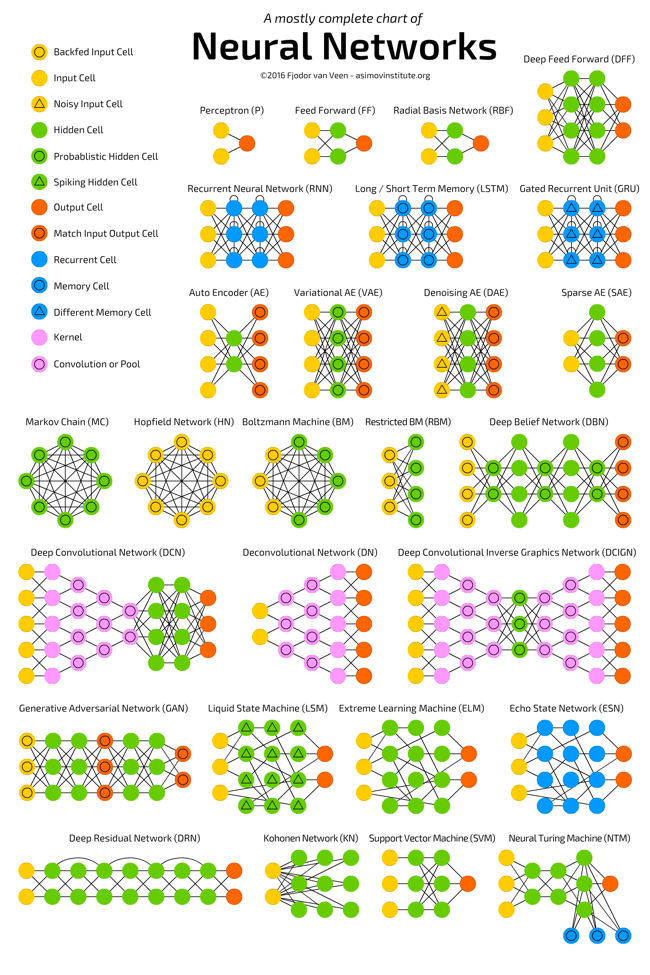

(Fjodor van Veen, 2016)

In [ ]:
# 1. Specify a model to be trained
# Also define the configuration/hyperparameters of a random forest model. 
# Here we specify that the NN model contains 2 hidden layers with 20 and 5 nodes respectively. (hidden_layer_sizes)
# All other parameters are set to default. 

## YOUR CODE HERE ##

In [ ]:
# 2. Train the model
## YOUR CODE HERE ##

In [ ]:
# 3. Make predictions
## YOUR CODE HERE ##

In [ ]:
# compute the residuals (error in prediction)
## YOUR CODE HERE ##

---

### Evaluation

In [ ]:
# to calculate MSE:
mean_squared_error(y_test, y_pred_nn)

In [ ]:
# to calculate RMSE:
mean_squared_error(y_test, y_pred_nn, squared = False)

In [ ]:
# to calculate R-squared:
r2_score(y_test, y_pred_nn)

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_nn, y = y_test)
g.set(xlabel = 'Predicted LOS', ylabel = 'Actual LOS', aspect=1)

# add a predicted=actual line for clarity. Ideally predictions should be close to this line.
diag_line_coor = (0, min(g.get_xlim()[1], g.get_ylim()[1]))
plt.plot(diag_line_coor, diag_line_coor, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 10))
g = sns.scatterplot(x = y_pred_nn, y = err_nn)
g.set(xlabel = 'Predicted LOS', ylabel = 'Residuals', aspect=1)

# add a horizontal line. Ideally predictions should be close to this line.
plt.axhline(y=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_nn)
g.set(xlabel = 'Residuals')

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(err_nn)
g.set(xlabel = 'Residuals', xlim = (-5, 5)) # specify boundaries for x axis to zoom in

# add a vertical line. Ideally predictions should be close to this line.
plt.axvline(x=0, color="black", ls="--", zorder=0)

In [ ]:
plt.figure(figsize = (10, 6))
g = sns.histplot(abs(err_nn), cumulative = True, stat = 'percent')
g.set(xlabel = 'Absolute Residuals', ylabel = 'Cumulative Percentage', xlim = (0, 15))

**Some Observations**

* The neural network is worse than both the tuned and untuned RF models. Tuning hyperparameters and including NN-specific pre-processing procedures are needed for it to produce good results. 

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(abs(err_rf2), cumulative = True, binwidth = .2, stat = 'percent', label = 'RF (tuned)',   color = 'red').set(xlabel = 'Absolute Residuals', ylabel = 'Cumulative Percentage', xlim = (0, 15))
sns.histplot(abs(err_rf1), cumulative = True, binwidth = .2, stat = 'percent', label = 'RF (untuned)', color = 'orange')
sns.histplot(abs(err_nn),  cumulative = True, binwidth = .2, stat = 'percent', label = 'NN (untuned)')
plt.legend() 

---

# References

* Jain, P., Coogan, S. C., Subramanian, S. G., Crowley, M., Taylor, S., & Flannigan, M. D. (2020). A review of machine learning applications in wildfire science and management. Environmental Reviews, 28(4), 478-505.